## **Task 1**

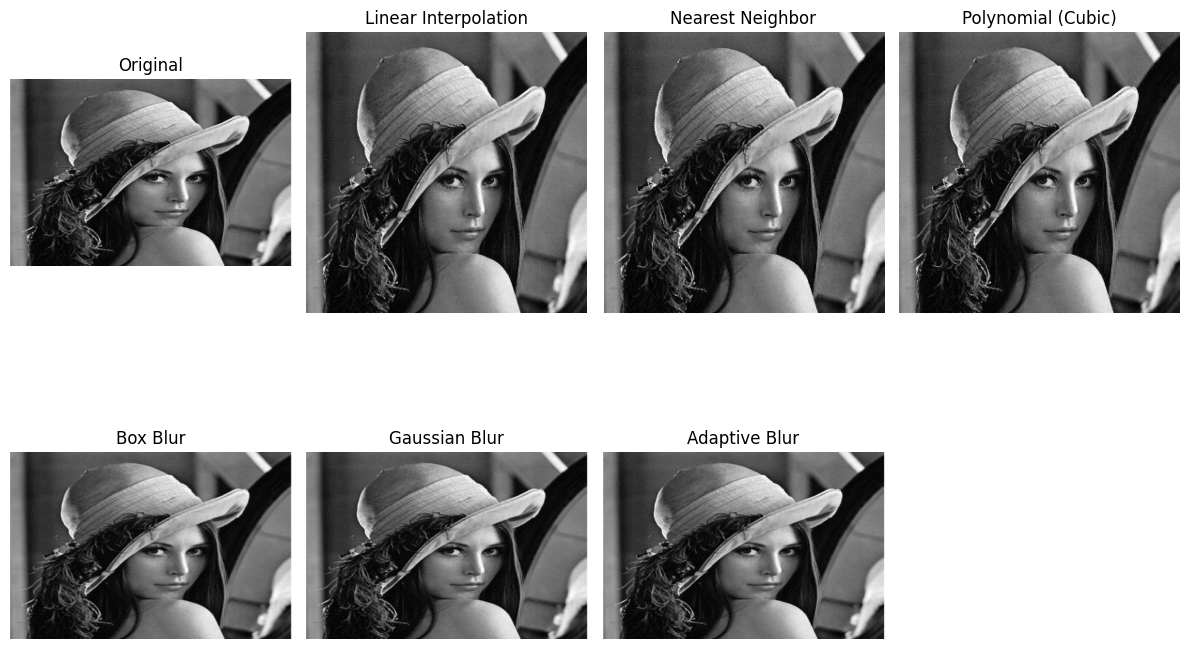

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Screenshot 2025-01-31 at 9.01.42 AM.png"  # Update this with your actual image path
image = cv2.imread(image_path)

# Resize the image to a fixed size for comparison.
new_size = (300, 300)

# 1.1 Image Resizing (Interpolation Methods)
# 1.1.1 Linear Interpolation
original_image = cv2.resize(image, new_size)
resized_linear = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)

# 1.1.2 Nearest Neighbors Interpolation
resized_nearest = cv2.resize(image, new_size, interpolation=cv2.INTER_NEAREST)

# 1.1.3 Polynomial Interpolation (Using Cubic interpolation as a polynomial approach)
resized_poly = cv2.resize(image, new_size, interpolation=cv2.INTER_CUBIC)

# 1.2 Image Blurring (Different Methods)
# 1.2.1 Box Blurring
box_blur = cv2.blur(image, (5, 5))

# 1.2.2 Gaussian Blurring
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# 1.2.3 Adaptive Blurring (Using Bilateral Filter for edge-preserving blurring)
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)

# Display Images
titles = [
    "Original", "Linear Interpolation", "Nearest Neighbor",
    "Polynomial (Cubic)", "Box Blur", "Gaussian Blur", "Adaptive Blur"
]
images = [
    image, resized_linear, resized_nearest, resized_poly,
    box_blur, gaussian_blur, adaptive_blur
]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


## **Task 2**

In [ ]:
from tensorflow.keras.datasets import mnist # type: ignore

(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train_full = X_train_full.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

print("Shape of Input Data (Training + Testing):", X_train_full.shape, X_test.shape)  # (60000, 784), (10000, 784)
print("Shape of Target Data (Training + Testing):", y_train_full.shape, y_test.shape)  # (60000,), (10000,)

Shape of Input Data (Training + Testing): (60000, 784) (10000, 784)
Shape of Target Data (Training + Testing): (60000,) (10000,)


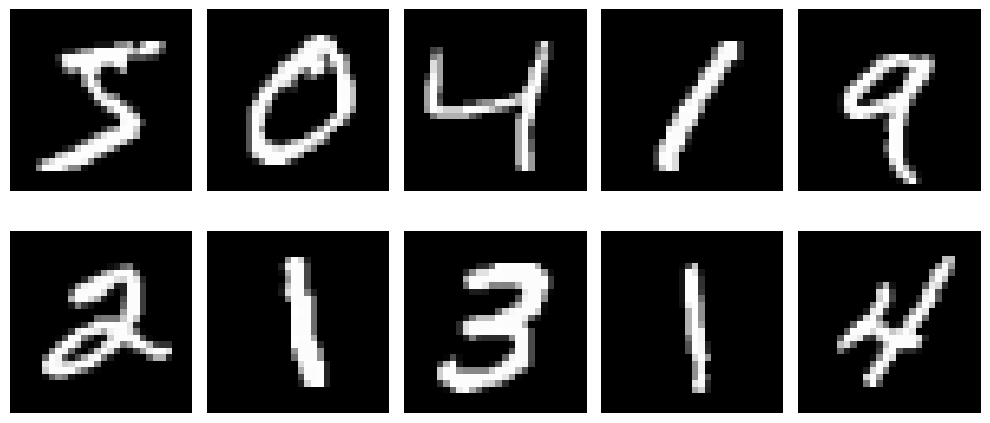

In [ ]:
import matplotlib.pyplot as plt

# Display top 10 images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_full[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
print("Training Data Shape:", X_train.shape, y_train.shape)  # (48000, 784), (48000,)
print("Validation Data Shape:", X_val.shape, y_val.shape)  # (12000, 784), (12000,)

Training Data Shape: (48000, 784) (48000,)
Validation Data Shape: (12000, 784) (12000,)


In [ ]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore

num_classes = 10
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,562 (107.66 KB)

 Trainable params: 27,562 (107.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose= True)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9767 - loss: 0.0828 - val_accuracy: 0.9557 - val_loss: 0.1481
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9766 - loss: 0.0804 - val_accuracy: 0.9577 - val_loss: 0.1452
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9790 - loss: 0.0740 - val_accuracy: 0.9607 - val_loss: 0.1383
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9797 - loss: 0.0712 - val_accuracy: 0.9597 - val_loss: 0.1425
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9817 - loss: 0.0631 - val_accuracy: 0.9583 - val_loss: 0.1489
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9815 - loss: 0.0629 - val_accuracy: 0.9592 - val_loss: 0.1434
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9839 - loss: 0.0591 - val_accuracy: 0.9583 - val_loss: 0.1519
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9849 - loss: 0.0536 - 

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)

# Calculate precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_classes, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9597
Precision: 0.9597854362158118
Recall: 0.9597
F1 Score: 0.9597076033218831


## **XGBoost**

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

In [ ]:
# Convert labels to integers
y = LabelEncoder().fit_transform(y)

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Define XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=10,
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

In [ ]:
# Train the model
xgb_classifier.fit(X_train, y_train, verbose=1)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:20:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=10, num_parallel_tree=None, ...)

In [ ]:
# Make predictions
y_pred = xgb_classifier.predict(X_test)

In [ ]:
# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9743    0.9870    0.9806      1381
           1     0.9848    0.9848    0.9848      1575
           2     0.9691    0.9649    0.9670      1398
           3     0.9647    0.9573    0.9610      1428
           4     0.9653    0.9575    0.9614      1365
           5     0.9734    0.9557    0.9644      1263
           6     0.9705    0.9796    0.9750      1375
           7     0.9697    0.9664    0.9681      1459
           8     0.9540    0.9582    0.9561      1365
           9     0.9369    0.9497    0.9432      1391

    accuracy                         0.9664     14000
   macro avg     0.9663    0.9661    0.9662     14000
weighted avg     0.9665    0.9664    0.9664     14000

